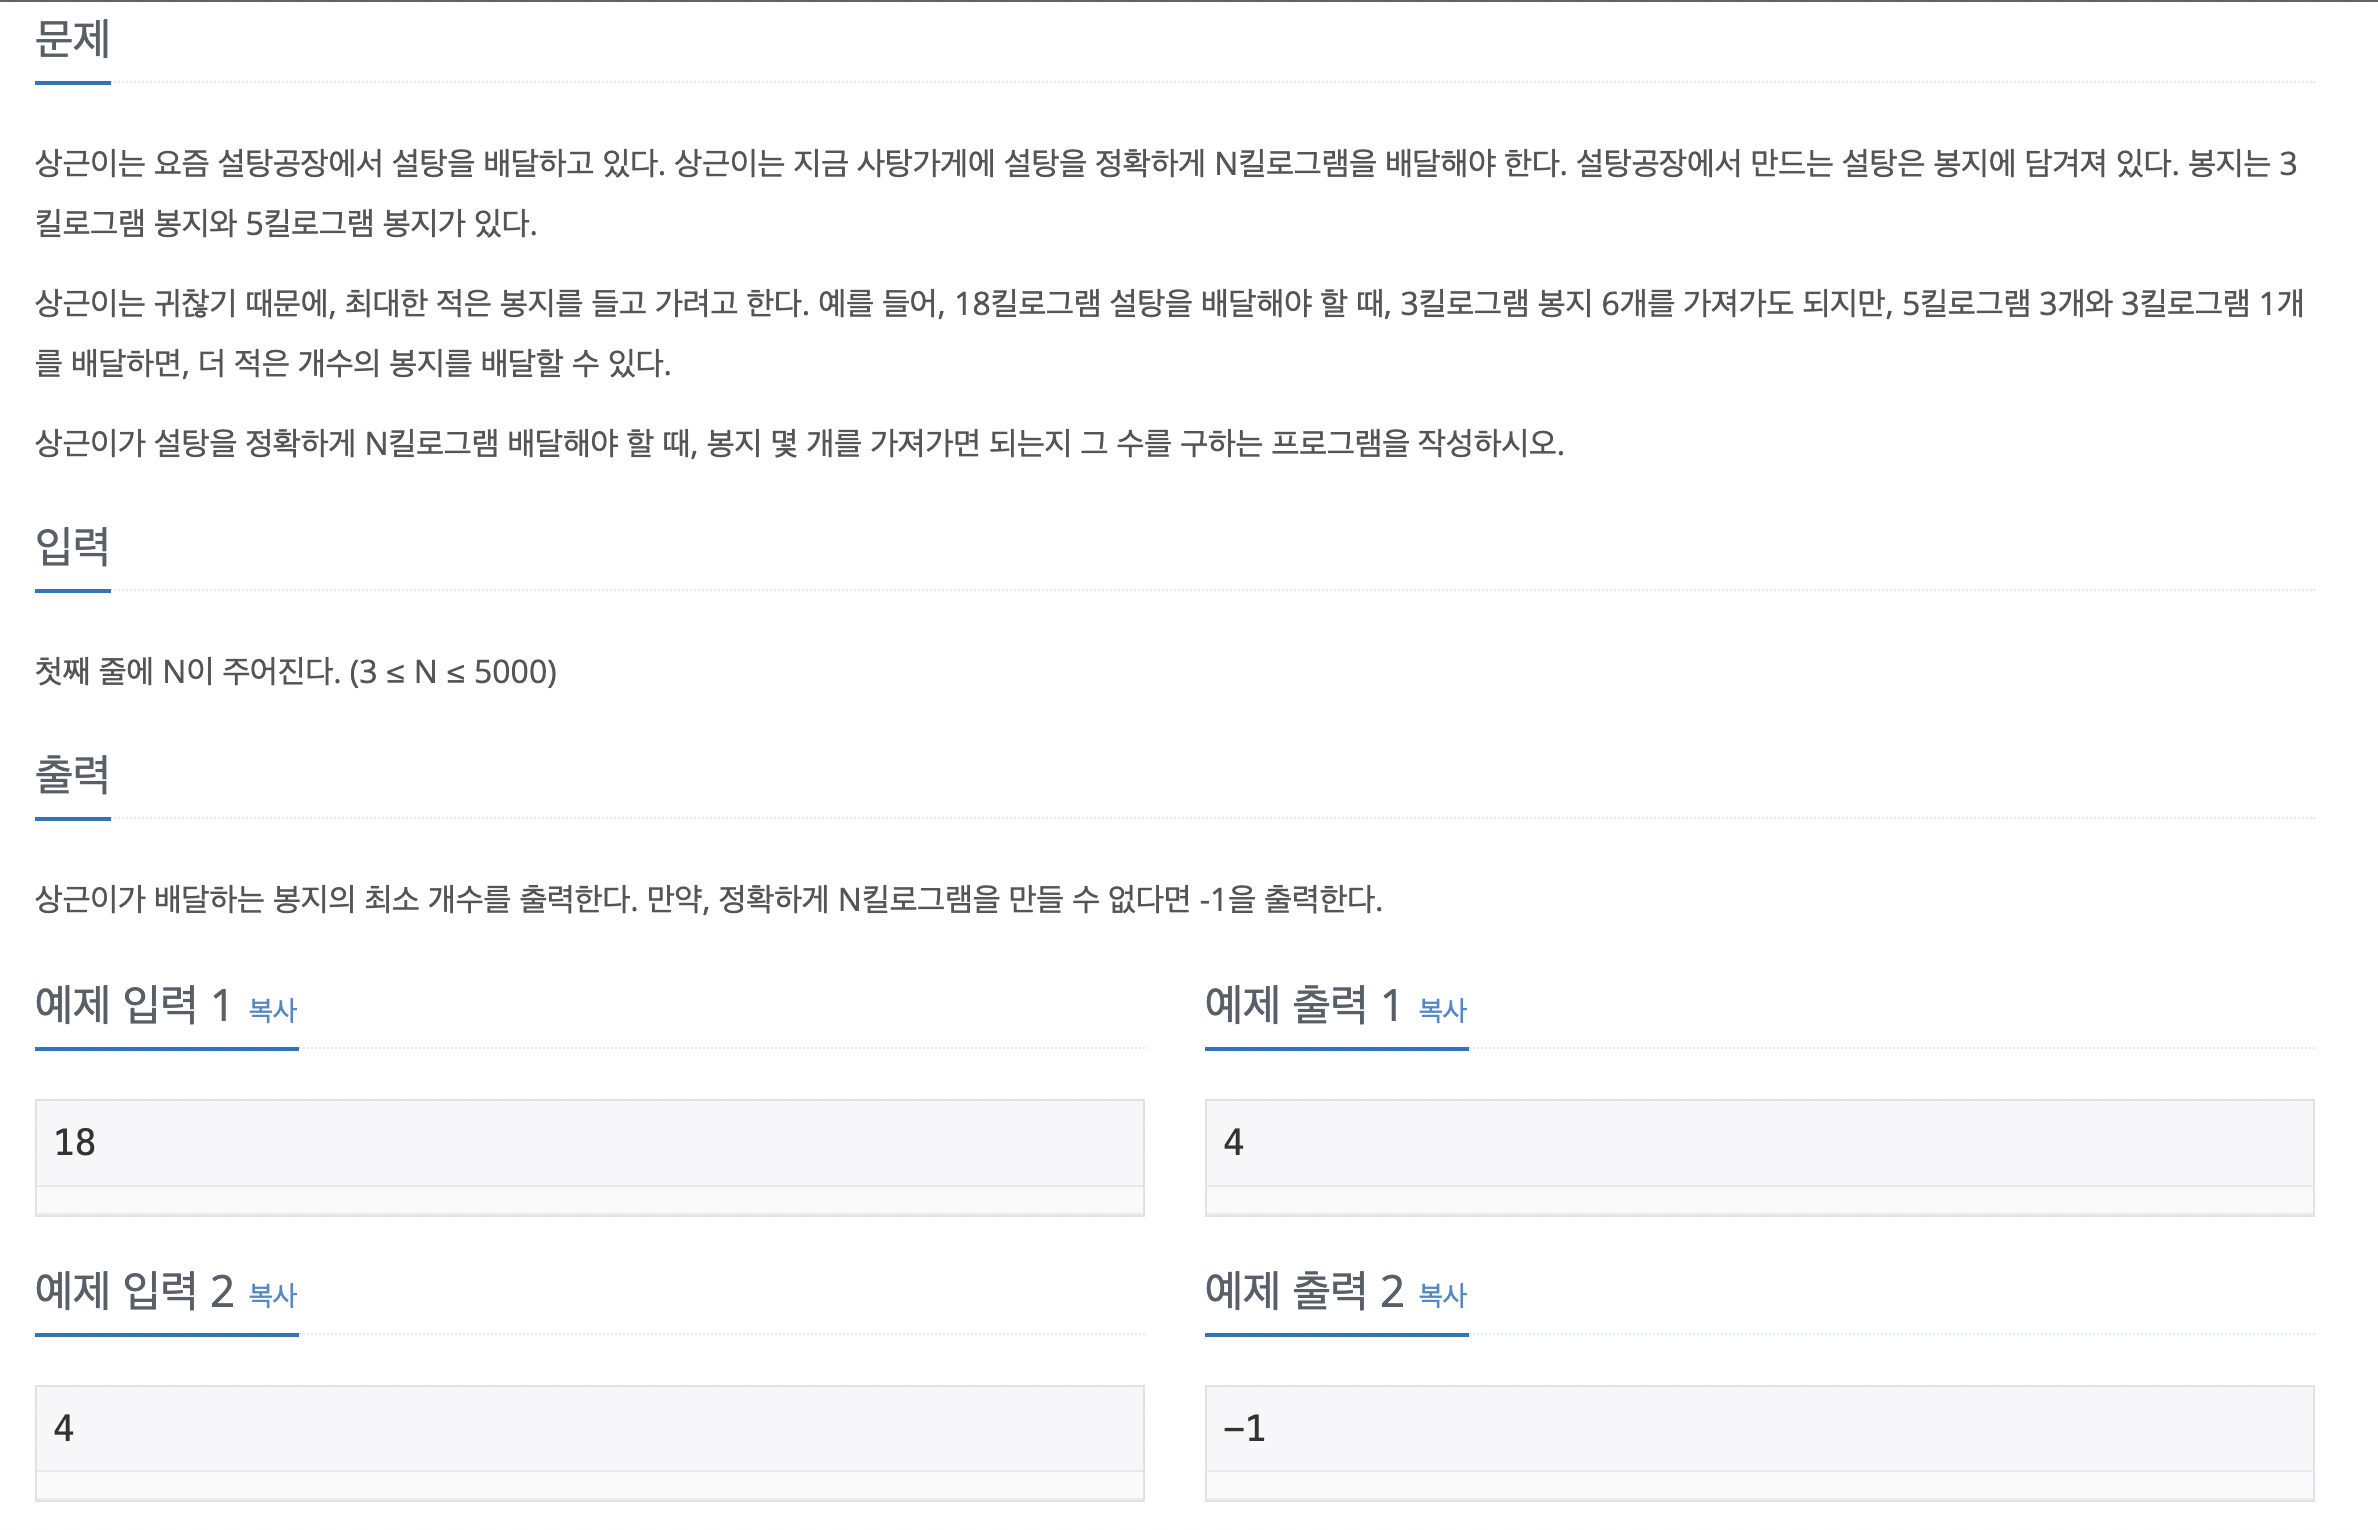

In [69]:
from IPython.display import Image
Image(filename='/Users/choichangho/Desktop/2839.png')

# 정답 

In [70]:
T = map(int, input().split())
for i in T:
    max_5kg_bag = i // 5 # 5Kg 봉지를 최대한 많이 썼을때 봉지수
    min_count = -1
    if i % 3 == 0:
        min_count = (i // 3)
    for j in range(max_5kg_bag, 0, -1):
        b = i - (5 * int(j)) # 5kg 봉지로 담고 남은 나머지 
        if b == 0:  
            min_count = j
            break
        if b % 3 == 0:
            min_count = j + (b//3)
            break 
    print(min_count)


4


## 1. 접근 방법  
'가장 적은' 봉지를 사용하고, '정확히' 맞추어야 한다는 것에서  

Brute force 방법이 제일 좋지 않을까 생각했다.  

더 큰 5 킬로그램 봉지를 먼저 사용해서 담고, 나머지를 3kg 봉지로 해결할 수 있는지 확인하는 것이 목표였다.

## 2. 시행착오.
 

5kg 봉지로 모두 담고 나머지를 3kg 봉지로 담는다고 가정했을 때  
 
그러니까  

'5kg으로 나눈 나머지가 3kg으로  담기지 않는다면 -1값일거야.'  
라고 막연히 생각했는데  
16kg같은 경우엔 5kg으로 나눈 나머지가 1kg이라서 3kg으로 담기지 않지만,  
5kg * 2 + 3kg *2로 담을 수 있다.  

 

5kg으로 담아봤을때 나눠 떨어지지 않는다면 5kg의 역할은 끝난거다.  
5kg으로 담은 경우를 5kg 봉지를 최대한 많이 쓴 상황부터 차례로 살펴보기로 했다.  
(n개)->(n-1)개->(n-2)개->...-> 1개  
이렇게 담고 남은 설탕을 3kg으로 담을 수 없다면 -1일거야!

## 3. 코드로 옮기기
### 공통적인 내용

In [72]:
# 변수는 다음과 같다
max_5kg_bag = i // 5  # 5Kg 봉지를 최대한 많이 썼을때 봉지수
total_count = -1  # 5kg, 3kg 봉지를 합한 수

# 5kg 봉지를 가장 많이 사용하는 것이 유리하므로,
for i in range(max_5kg_bag, 0, -1): # 와 같이 제일 많이쓴 경우부터 차례로 보기로 한다

### 코드로 옮길 때의 시행착오

#### 1) for문을 돌며 5kg 봉지로 담고 남은 설탕 kg수에는 %를 쓰지 않는다!

In [73]:
N = map(int, input().split())
for i in N:
    max_5kg_bag = i // 5 # 5Kg 봉지를 최대한 많이 썼을때 봉지수
    total_count = -1 # 5kg, 3kg 봉지를 합한 수
    for j in range(max_5kg_bag, 0, -1):
        rest = i % (5 * (max_5kg_bag)) # 5kg 봉지로 담고 남은 설탕 kg수
        if rest == 0:  
            total_count = j  # 5kg 봉지만 썼을 때
            break
        if rest % 3 == 0:
            total_count = j + (rest // 3)  # j: 5kg봉지, rest//3 : 3kg봉지수
            break
        total_count = -1
    if i % 3 == 0:
        total_count = (i // 3)
    print(total_count)

#### 첫 시행이었다.

1) '나머지' 라는 말에 스스로 사로잡혀  
rest, 즉, 5kg 봉지로 담고 남은 설탕 kg수에 '%' 연산자를 써버렸다.  
이렇게되면  
16kg을 잴 때 5kg 봉지를 2개쓰든 3개를 쓰든 1kg만 남게되어  
결국 3개를 쓴 것과 다름없기 때문이다.  


2) if i % 3 ==0: 의 위치도 이상하다.  
이렇게 쓰게되면   
18kg을 잴 때 5kg봉지 3개 + 3kg봉지 1개로 total_count가 이미 4개로 정해졌는데  
마지막에 6개로 나누어지니 total_count = 6으로 초기화된다.

### 2) 본질을 파악하라

In [74]:
N = map(int, input().split())
for i in N:
    max_5kg_bag = i // 5 # 5Kg 봉지를 최대한 많이 썼을때 봉지수
    total_count = -1 # 5kg, 3kg 봉지를 합한 수
    for j in range(max_5kg_bag, 0, -1):
        rest = i - (5 * (max_5kg_bag)) # 5kg 봉지로 담고 남은 설탕 kg수
        if rest == 0:  
            total_count = j
            break
        if rest % 3 == 0:
            total_count = j + (rest // 3)
            break
    if i % 3 == 0:
        total_count = min(total_count,(i // 3))
    print(total_count)

#### min(total_count, (i//3)) 을하면 5kg이 더 많이 사용된 곳에서 나온 경우를 거르지 않을까?

라고 생각했더니 5kg bag을 아예 사용하지 않았을때  
total_count = -1 로 오는 경우를 걸러내지 못했다.

In [75]:
T = map(int, input().split())
for i in T:
    max_5kg_bag = i // 5 # 5Kg 봉지를 최대한 많이 썼을때 봉지수
    total_count = -1
    if i % 3 == 0:
        total_count = (i // 3)
    for j in range(max_5kg_bag, 0, -1):
        b = i - (5 * int(j)) # 5kg 봉지로 담고 남은 나머지 
        if b == 0:  
            total_count = j
            break
        if b % 3 == 0:
            total_count = j + (b//3)
            break 
    print(total_count)

4


단순히 5kg bag을 더 많이 사용해야 한다고해서 5kg을 고려하는 것이 옳지 않을 수 있다!  
Base에 3kg bag의 경우를 깔면  
- ➀5kg bag을 사용하지 않을때 => ➁3kg만 사용하는 경우를 고려 => ➂정확히 나눠지지 않으니 -1출력  

이라는 사고 흐름을 가져야한다!  

그래서 우리는 ➂-> ➁ -> ➀ 순으로 세밀히 생각해야한다.  
base로 ➂을 깔고(total_count = -1),  
➁를 그다음에 깔고,  
 if i % 3 == 0:  
    total_count = (i // 3)  
그 다음에야 5kg bag을 사용하는 경우를 가장 세밀한 경우(가장 들여쓰기 된 조건)로 빼는 것이다  